# Sentiment Analysis

## Introduction

So far, all of the analysis we've done has been pretty generic - looking at counts, creating scatter plots, etc. These techniques could be applied to numeric data as well.

When it comes to text data, there are a few popular techniques that we'll be going through in the next few notebooks, starting with sentiment analysis. A few key points to remember with sentiment analysis.

1. **TextBlob Module:** Linguistic researchers have labeled the sentiment of words based on their domain expertise. Sentiment of words can vary based on where it is in a sentence. The TextBlob module allows us to take advantage of these labels.
2. **Sentiment Labels:** Each word in a corpus is labeled in terms of polarity and subjectivity (there are more labels as well, but we're going to ignore them for now). A corpus' sentiment is the average of these.
   * **Polarity**: How positive or negative a word is. -1 is very negative. +1 is very positive.
   * **Subjectivity**: How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.

For more info on how TextBlob coded up its [sentiment function](https://planspace.org/20150607-textblob_sentiment/).

Let's take a look at the sentiment of the various transcripts, both overall and throughout the comedy routine.

## Sentiment of Routine

In [ ]:
# We'll start by reading in the corpus, which preserves word order
import pandas as pd

data = pd.read_pickle('corpus.pkl')
data

transcript         full_name
adam       \n\n\n\n\n\n\n\nAdam Sandler: Love You (2024)...      Adam Sandler
ali        \n\n\n\n\n\n\n\nAli Wong: Baby Cobra (2016) |...          Ali Wong
anthony    \n\n\n\n\n\n\n\nAnthony Jeselnik: Thoughts An...  Anthony Jeselnik
bill       \n\n\n\n\n\n\n\nBILL BURR: I'M SORRY YOU FEEL...         Bill Burr
bo         \n\n\n\n\n\n\n\nScraps from the loft\n\n\n\n\...        Bo Burnham
chad       \n\n\n\n\n\n\n\nChad Daniels: Dad Chaniels (2...      Chad Daniels
dave       \n\n\n\n\n\n\n\nDave Chappelle: The Age of Sp...    Dave Chappelle
ellen      \n\n\n\n\n\n\n\nEllen DeGeneres: For Your App...   Ellen DeGeneres
gabriel    \n\n\n\n\n\n\n\nGabriel Iglesias: Legend of F...  Gabriel Iglesias
hasan      \n\n\n\n\n\n\n\nScraps from the loft\n\n\n\n\...      Hasan Minhaj
jeff       \n\n\n\n\n\n\n\nJeff Dunham's Scrooged-Up Hol...       Jeff Dunham
jim        \n\n\n\n\n\n\n\nJIM JEFFERIES: BARE (2014) - ...     Jim Jefferies
joe        \n\n\n\n\n\n\n\nJoe Rogan: Triggered (2016) -...         Joe Rogan
john       \n\n\n\n\n\n\n\nJohn Mulaney: The Comeback Ki...      John Mulaney
louis      \n\n\n\n\n\n\n\nLouis C.K.: Oh My God (2013) ...        Louis C.K.
michelle   \n\n\n\n\n\n\n\nMichelle Buteau: A Buteau-ful...   Michelle Buteau
mike       \n\n\n\n\n\n\n\nMike Birbiglia: My Girlfriend...    Mike Birbiglia
nate       \n\n\n\n\n\n\n\nYour Friend, Nate Bargatze (2...     Nate Bargatze
ricky      \n\n\n\n\n\n\n\nRicky Gervais: Humanity (2018...     Ricky Gervais
ronny      \n\n\n\n\n\n\n\nRonny Chieng: Love to Hate It...      Ronny Chieng
theo       \n\n\n\n\n\n\n\nTheo Von: No Offense (2016) |...          Theo Von

In [ ]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data

transcript         full_name  \
adam       \n\n\n\n\n\n\n\nAdam Sandler: Love You (2024)...      Adam Sandler   
ali        \n\n\n\n\n\n\n\nAli Wong: Baby Cobra (2016) |...          Ali Wong   
anthony    \n\n\n\n\n\n\n\nAnthony Jeselnik: Thoughts An...  Anthony Jeselnik   
bill       \n\n\n\n\n\n\n\nBILL BURR: I'M SORRY YOU FEEL...         Bill Burr   
bo         \n\n\n\n\n\n\n\nScraps from the loft\n\n\n\n\...        Bo Burnham   
chad       \n\n\n\n\n\n\n\nChad Daniels: Dad Chaniels (2...      Chad Daniels   
dave       \n\n\n\n\n\n\n\nDave Chappelle: The Age of Sp...    Dave Chappelle   
ellen      \n\n\n\n\n\n\n\nEllen DeGeneres: For Your App...   Ellen DeGeneres   
gabriel    \n\n\n\n\n\n\n\nGabriel Iglesias: Legend of F...  Gabriel Iglesias   
hasan      \n\n\n\n\n\n\n\nScraps from the loft\n\n\n\n\...      Hasan Minhaj   
jeff       \n\n\n\n\n\n\n\nJeff Dunham's Scrooged-Up Hol...       Jeff Dunham   
jim        \n\n\n\n\n\n\n\nJIM JEFFERIES: BARE (2014) - ...     Jim Jefferies   
joe        \n\n\n\n\n\n\n\nJoe Rogan: Triggered (2016) -...         Joe Rogan   
john       \n\n\n\n\n\n\n\nJohn Mulaney: The Comeback Ki...      John Mulaney   
louis      \n\n\n\n\n\n\n\nLouis C.K.: Oh My God (2013) ...        Louis C.K.   
michelle   \n\n\n\n\n\n\n\nMichelle Buteau: A Buteau-ful...   Michelle Buteau   
mike       \n\n\n\n\n\n\n\nMike Birbiglia: My Girlfriend...    Mike Birbiglia   
nate       \n\n\n\n\n\n\n\nYour Friend, Nate Bargatze (2...     Nate Bargatze   
ricky      \n\n\n\n\n\n\n\nRicky Gervais: Humanity (2018...     Ricky Gervais   
ronny      \n\n\n\n\n\n\n\nRonny Chieng: Love to Hate It...      Ronny Chieng   
theo       \n\n\n\n\n\n\n\nTheo Von: No Offense (2016) |...          Theo Von   

          polarity  subjectivity  
adam      0.032743      0.556062  
ali       0.073649      0.484622  
anthony   0.065522      0.555663  
bill      0.019287      0.538025  
bo        0.562500      0.350000  
chad      0.118939      0.509838  
dave      0.003528      0.513124  
ellen     0.138680      0.556903  
gabriel   0.110659      0.480226  
hasan     0.562500      0.350000  
jeff      0.161011      0.533912  
jim       0.048914      0.520975  
joe       0.044125      0.545846  
john      0.085424      0.482800  
louis     0.062150      0.515184  
michelle  0.154376      0.529737  
mike      0.096419      0.517710  
nate      0.107914      0.475951  
ricky     0.070584      0.497885  
ronny     0.121693      0.460936  
theo      0.049315      0.507621

<ipython-input-4-94116c940710>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(x+.001, y+.001, data['full_name'][index], fontsize=10)


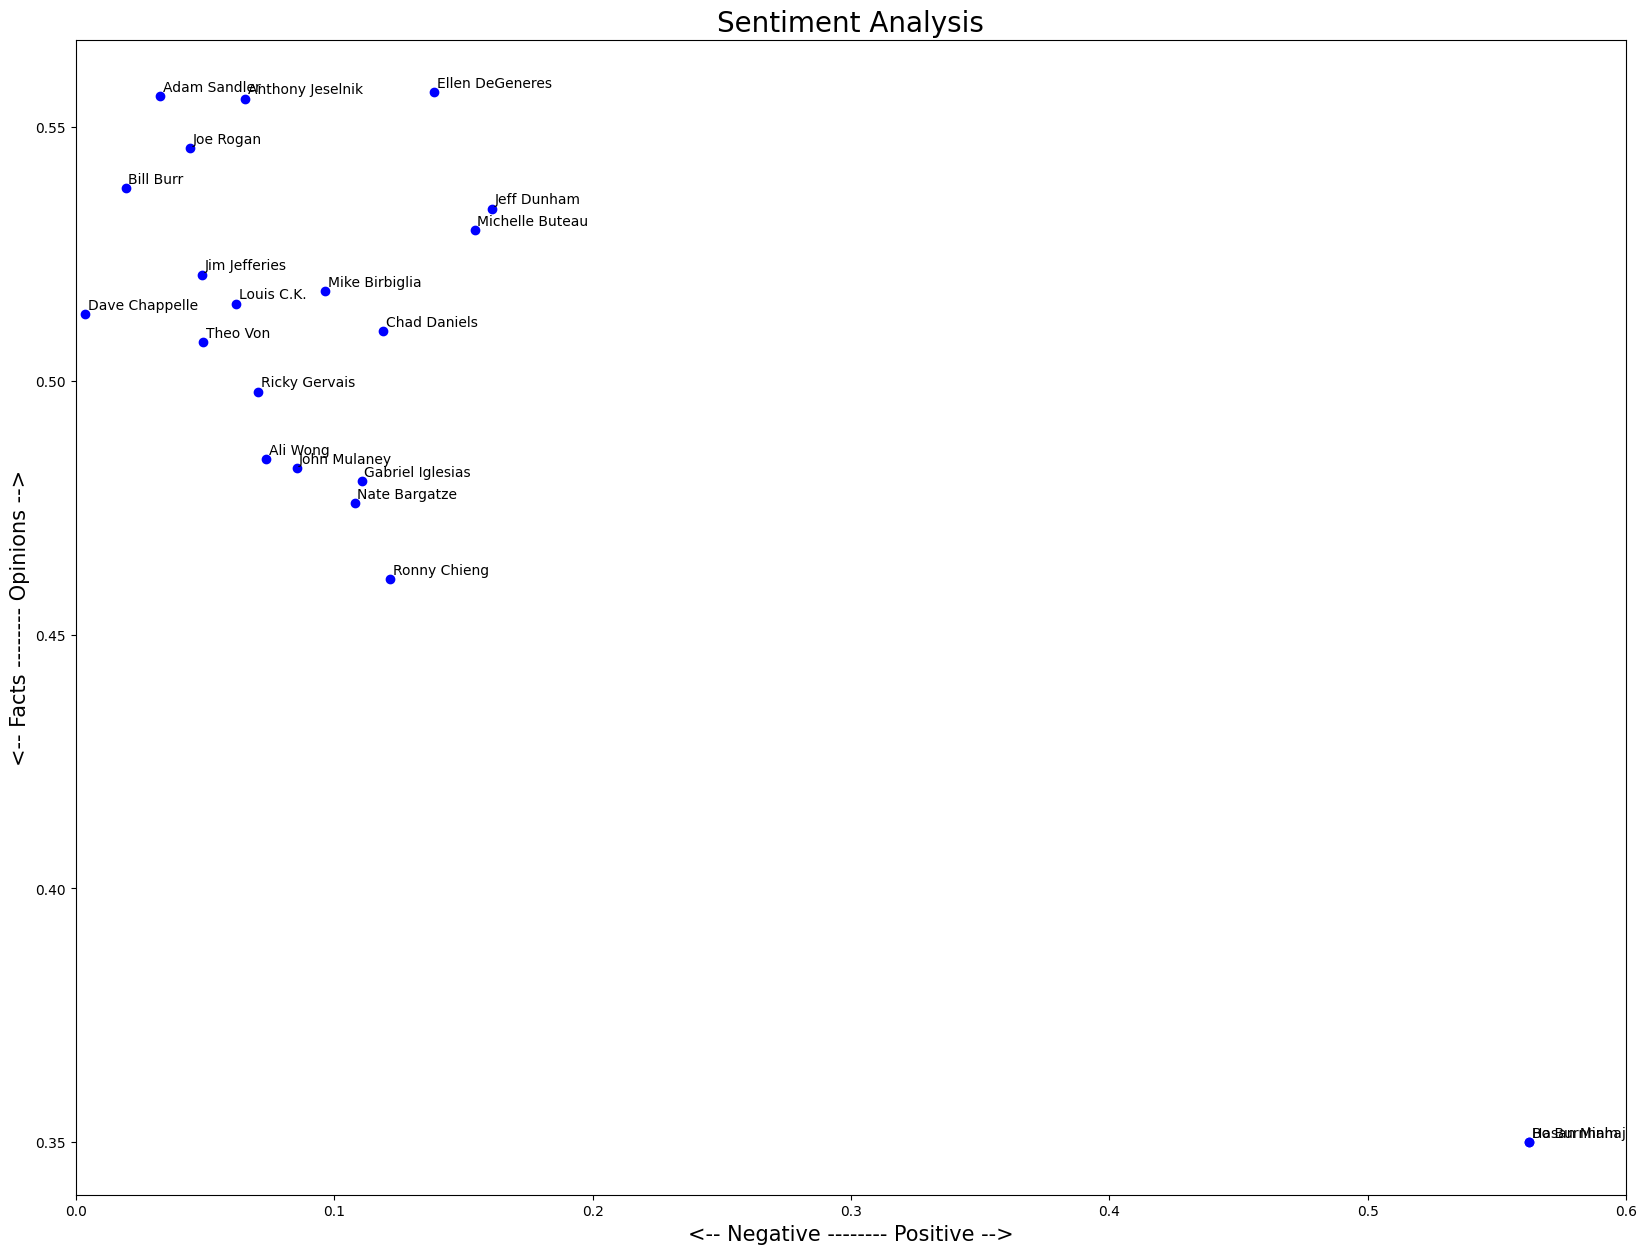

In [ ]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [20, 15]

for index, comedian in enumerate(data.index):
    x = data.polarity.loc[comedian]
    y = data.subjectivity.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data['full_name'][index], fontsize=10)
    plt.xlim(0.0, .60)

plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

Findings:
Dave Chappelle and Bill Burr are too opiniated and negative.

Bo Burnham ad Hasan Minhaj are too factual.

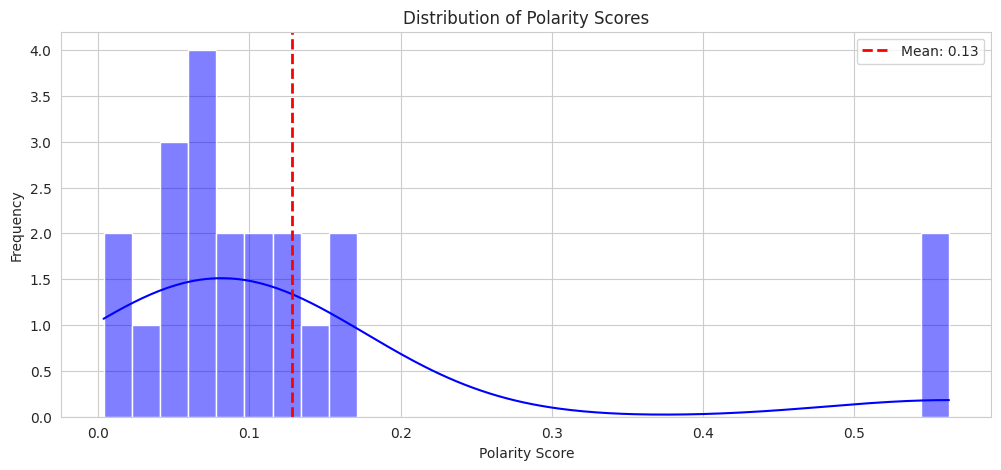

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")

# Plot distribution of polarity
plt.figure(figsize=(12, 5))
sns.histplot(data['polarity'], bins=30, kde=True, color='blue')
plt.axvline(data['polarity'].mean(), color='red', linestyle='dashed', linewidth=2, label=f'Mean: {data["polarity"].mean():.2f}')
plt.title("Distribution of Polarity Scores")
plt.xlabel("Polarity Score")
plt.ylabel("Frequency")
plt.legend()
plt.show()

Most transcripts have polarity scores near zero, indicating a mix of neutral, slightly positive, and slightly negative sentiments.

The mean polarity is slightly positive, suggesting that the transcripts tend to have more positive sentiment than negative.

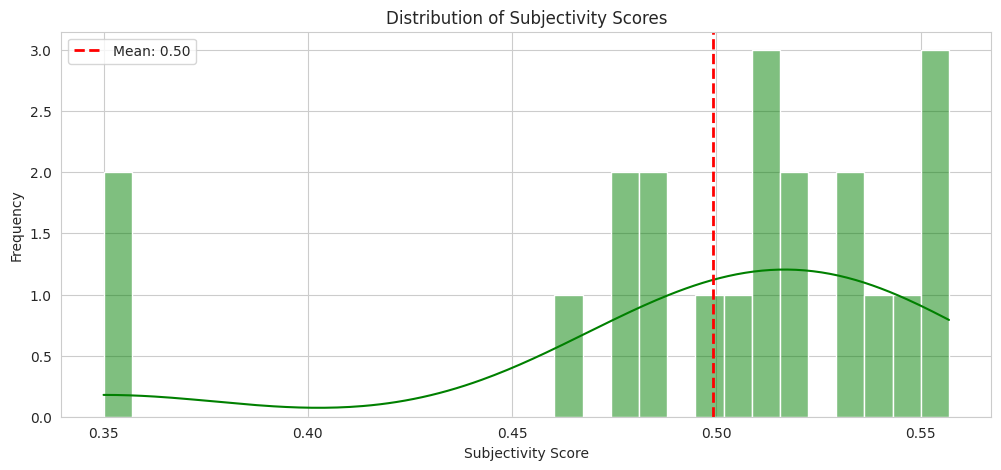

In [ ]:
# Plot distribution of subjectivity
plt.figure(figsize=(12, 5))
sns.histplot(data['subjectivity'], bins=30, kde=True, color='green')
plt.axvline(data['subjectivity'].mean(), color='red', linestyle='dashed', linewidth=2, label=f'Mean: {data["subjectivity"].mean():.2f}')
plt.title("Distribution of Subjectivity Scores")
plt.xlabel("Subjectivity Score")
plt.ylabel("Frequency")
plt.legend()
plt.show()


The subjectivity scores are spread across the range, with a peak around 0.5, meaning many transcripts contain both factual and opinion-based content.

The mean subjectivity score suggests that the transcripts are generally neither purely objective nor purely subjective.

<ipython-input-7-4dc7261becf1>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pd.concat([top_positive_comedians, top_negative_comedians]), x="polarity", y="full_name", palette="coolwarm")


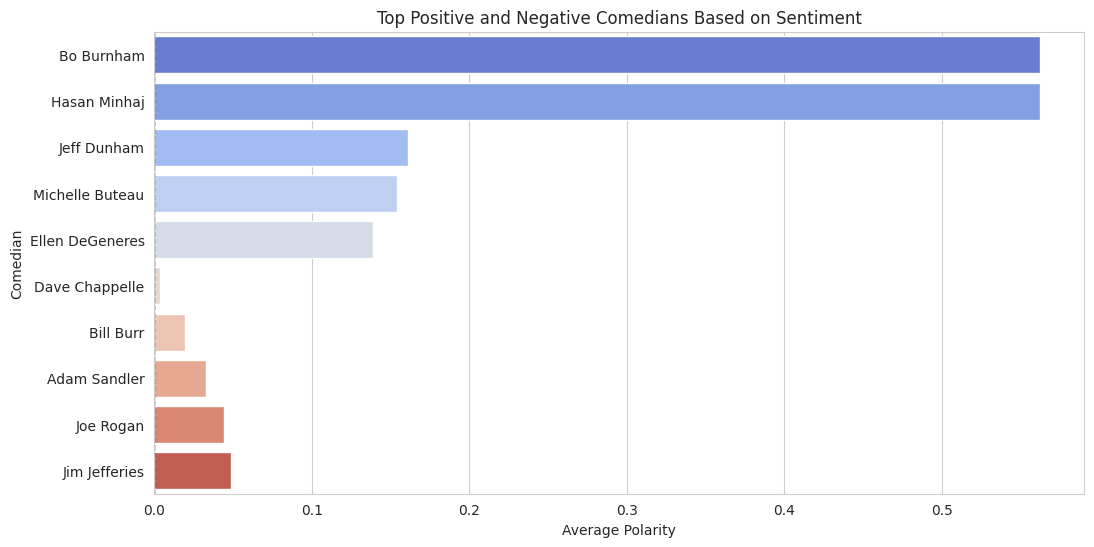

In [ ]:
# Grouping by comedian (full_name) and calculating average sentiment scores
comedian_sentiment = data.groupby("full_name")[["polarity", "subjectivity"]].mean().reset_index()

# Sorting comedians by polarity (most positive and most negative)
top_positive_comedians = comedian_sentiment.nlargest(5, "polarity")
top_negative_comedians = comedian_sentiment.nsmallest(5, "polarity")

# Plot: Top positive and negative comedians
plt.figure(figsize=(12, 6))
sns.barplot(data=pd.concat([top_positive_comedians, top_negative_comedians]), x="polarity", y="full_name", palette="coolwarm")
plt.axvline(0, color='black', linestyle='dashed', linewidth=1)
plt.title("Top Positive and Negative Comedians Based on Sentiment")
plt.xlabel("Average Polarity")
plt.ylabel("Comedian")
plt.show()


Some comedians have consistently high positive polarity, indicating a generally uplifting or optimistic tone.

Others lean toward negative polarity, suggesting more critical, dark, or sarcastic humor.

<ipython-input-8-ac6998326f62>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pd.concat([most_subjective_comedians, least_subjective_comedians]), x="subjectivity", y="full_name", palette="viridis")


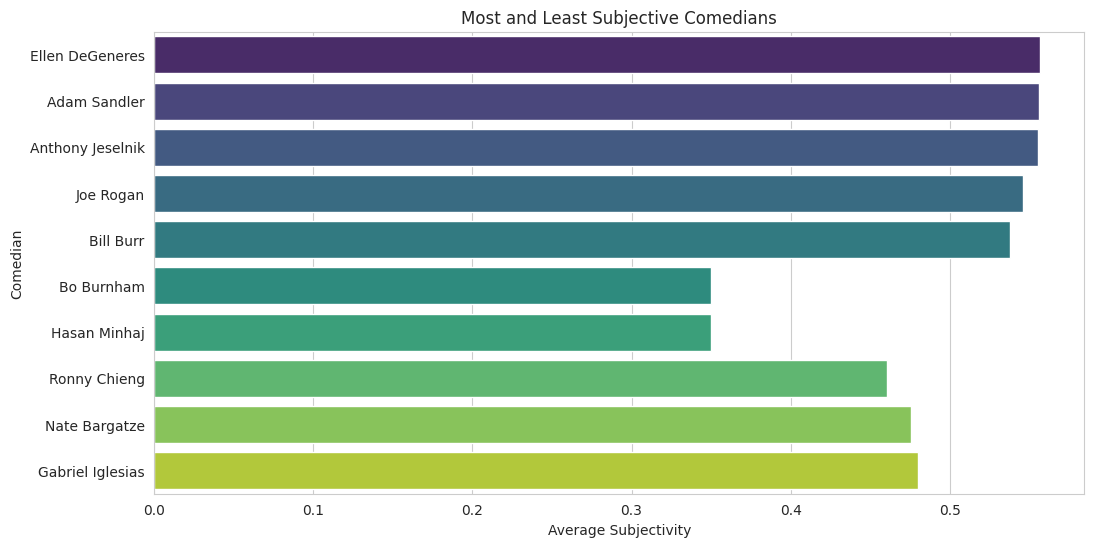

In [ ]:

# Sorting comedians by subjectivity (most and least opinionated)
most_subjective_comedians = comedian_sentiment.nlargest(5, "subjectivity")
least_subjective_comedians = comedian_sentiment.nsmallest(5, "subjectivity")

# Plot: Most and least subjective comedians
plt.figure(figsize=(12, 6))
sns.barplot(data=pd.concat([most_subjective_comedians, least_subjective_comedians]), x="subjectivity", y="full_name", palette="viridis")
plt.title("Most and Least Subjective Comedians")
plt.xlabel("Average Subjectivity")
plt.ylabel("Comedian")
plt.show()


Some comedians are highly subjective, meaning their content is filled with personal opinions and emotional expressions.

Others are more objective, likely discussing factual content or observational humor.

## Sentiment of Routine Over Time

Instead of looking at the overall sentiment, let's see if there's anything interesting about the sentiment over time throughout each routine.

In [ ]:
# Split each routine into 10 parts
import numpy as np
import math

def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)

    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [ ]:
# Let's take a look at our data again
data

transcript         full_name  \
adam       \n\n\n\n\n\n\n\nAdam Sandler: Love You (2024)...      Adam Sandler   
ali        \n\n\n\n\n\n\n\nAli Wong: Baby Cobra (2016) |...          Ali Wong   
anthony    \n\n\n\n\n\n\n\nAnthony Jeselnik: Thoughts An...  Anthony Jeselnik   
bill       \n\n\n\n\n\n\n\nBILL BURR: I'M SORRY YOU FEEL...         Bill Burr   
bo         \n\n\n\n\n\n\n\nScraps from the loft\n\n\n\n\...        Bo Burnham   
chad       \n\n\n\n\n\n\n\nChad Daniels: Dad Chaniels (2...      Chad Daniels   
dave       \n\n\n\n\n\n\n\nDave Chappelle: The Age of Sp...    Dave Chappelle   
ellen      \n\n\n\n\n\n\n\nEllen DeGeneres: For Your App...   Ellen DeGeneres   
gabriel    \n\n\n\n\n\n\n\nGabriel Iglesias: Legend of F...  Gabriel Iglesias   
hasan      \n\n\n\n\n\n\n\nScraps from the loft\n\n\n\n\...      Hasan Minhaj   
jeff       \n\n\n\n\n\n\n\nJeff Dunham's Scrooged-Up Hol...       Jeff Dunham   
jim        \n\n\n\n\n\n\n\nJIM JEFFERIES: BARE (2014) - ...     Jim Jefferies   
joe        \n\n\n\n\n\n\n\nJoe Rogan: Triggered (2016) -...         Joe Rogan   
john       \n\n\n\n\n\n\n\nJohn Mulaney: The Comeback Ki...      John Mulaney   
louis      \n\n\n\n\n\n\n\nLouis C.K.: Oh My God (2013) ...        Louis C.K.   
michelle   \n\n\n\n\n\n\n\nMichelle Buteau: A Buteau-ful...   Michelle Buteau   
mike       \n\n\n\n\n\n\n\nMike Birbiglia: My Girlfriend...    Mike Birbiglia   
nate       \n\n\n\n\n\n\n\nYour Friend, Nate Bargatze (2...     Nate Bargatze   
ricky      \n\n\n\n\n\n\n\nRicky Gervais: Humanity (2018...     Ricky Gervais   
ronny      \n\n\n\n\n\n\n\nRonny Chieng: Love to Hate It...      Ronny Chieng   
theo       \n\n\n\n\n\n\n\nTheo Von: No Offense (2016) |...          Theo Von   

          polarity  subjectivity  
adam      0.032743      0.556062  
ali       0.073649      0.484622  
anthony   0.065522      0.555663  
bill      0.019287      0.538025  
bo        0.562500      0.350000  
chad      0.118939      0.509838  
dave      0.003528      0.513124  
ellen     0.138680      0.556903  
gabriel   0.110659      0.480226  
hasan     0.562500      0.350000  
jeff      0.161011      0.533912  
jim       0.048914      0.520975  
joe       0.044125      0.545846  
john      0.085424      0.482800  
louis     0.062150      0.515184  
michelle  0.154376      0.529737  
mike      0.096419      0.517710  
nate      0.107914      0.475951  
ricky     0.070584      0.497885  
ronny     0.121693      0.460936  
theo      0.049315      0.507621

In [ ]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)

list_pieces

[[' \n\n\n\n\n\n\n\nAdam Sandler: Love You (2024) | Transcript - Scraps from the loft\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\t\tSkip to content\n\n\n\n\n\n\n\n\n\n \n\n\n\n\n\n\n\n\n\n\n\t\t\t\t\t\tSearch\t\t\t\t\t\n \n\n\n \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMOVIES\n\nMOVIE REVIEWS\nMOVIE TRANSCRIPTS\n\n\nTV SERIES\n\nTV SHOW TRANSCRIPTS\n\n\nCOMEDY\n\nSTAND-UP COMEDY TRANSCRIPTS\nGEORGE CARLIN\nDAVE CHAPPELLE\n\n\nINTERVIEWS\n\nPLAYBOY INTERVIEWS\n\n\nMUSIC\nHISTORY\nBOOKS\nOPINIONS\n \n\n \n\nMOVIES\n\nMOVIE REVIEWS\nMOVIE TRANSCRIPTS\n\n\nTV SERIES\n\nTV SHOW TRANSCRIPTS\n\n\nCOMEDY\n\nSTAND-UP COMEDY TRANSCRIPTS\nGEORGE CARLIN\nDAVE CHAPPELLE\n\n\nINTERVIEWS\n\nPLAYBOY INTERVIEWS\n\n\nMUSIC\nHISTORY\nBOOKS\nOPINIONS\n \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nCOMEDY \n\n\n\n\n\n\n\nAdam Sandler: Love You (2024) | Transcript \n\n\n\n\n\n\n\nAugust 

In [ ]:
# The list has 10 elements, one for each transcript
len(list_pieces)

21

In [ ]:
# Each transcript has been split into 10 pieces of text
len(list_pieces[0])

10

In [ ]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)

polarity_transcript

[[0.08385079759002173,
  0.10826928977791042,
  -0.06985125811688311,
  -0.015156154609279616,
  -0.07754779942279941,
  -0.09019207102672294,
  0.10139717326324468,
  -0.04888532516566498,
  0.11565412186379931,
  0.25799560959135437],
 [0.10744246031746031,
  0.0405578559926386,
  0.10666295754323923,
  0.08667154291094968,
  -0.028430913348946138,
  0.15012916475644345,
  0.016447210197210193,
  0.11705981775426216,
  -0.0057330747955747835,
  0.15314360119047615],
 [0.16441445062873636,
  -0.03857869104579631,
  -0.04726972948803938,
  0.03733672936259143,
  0.09337880686564896,
  0.17912151067323479,
  0.06152423469387754,
  -0.05804716117216117,
  0.10978672927825474,
  0.18977986712361705],
 [-0.010431629607765976,
  -0.006830621485793921,
  0.02170249412896471,
  0.012480488261738245,
  -0.01859303890553891,
  0.08355856121326419,
  -0.00777160339660341,
  -0.016357323232323237,
  0.06430482069370956,
  0.08121492704826035],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5625

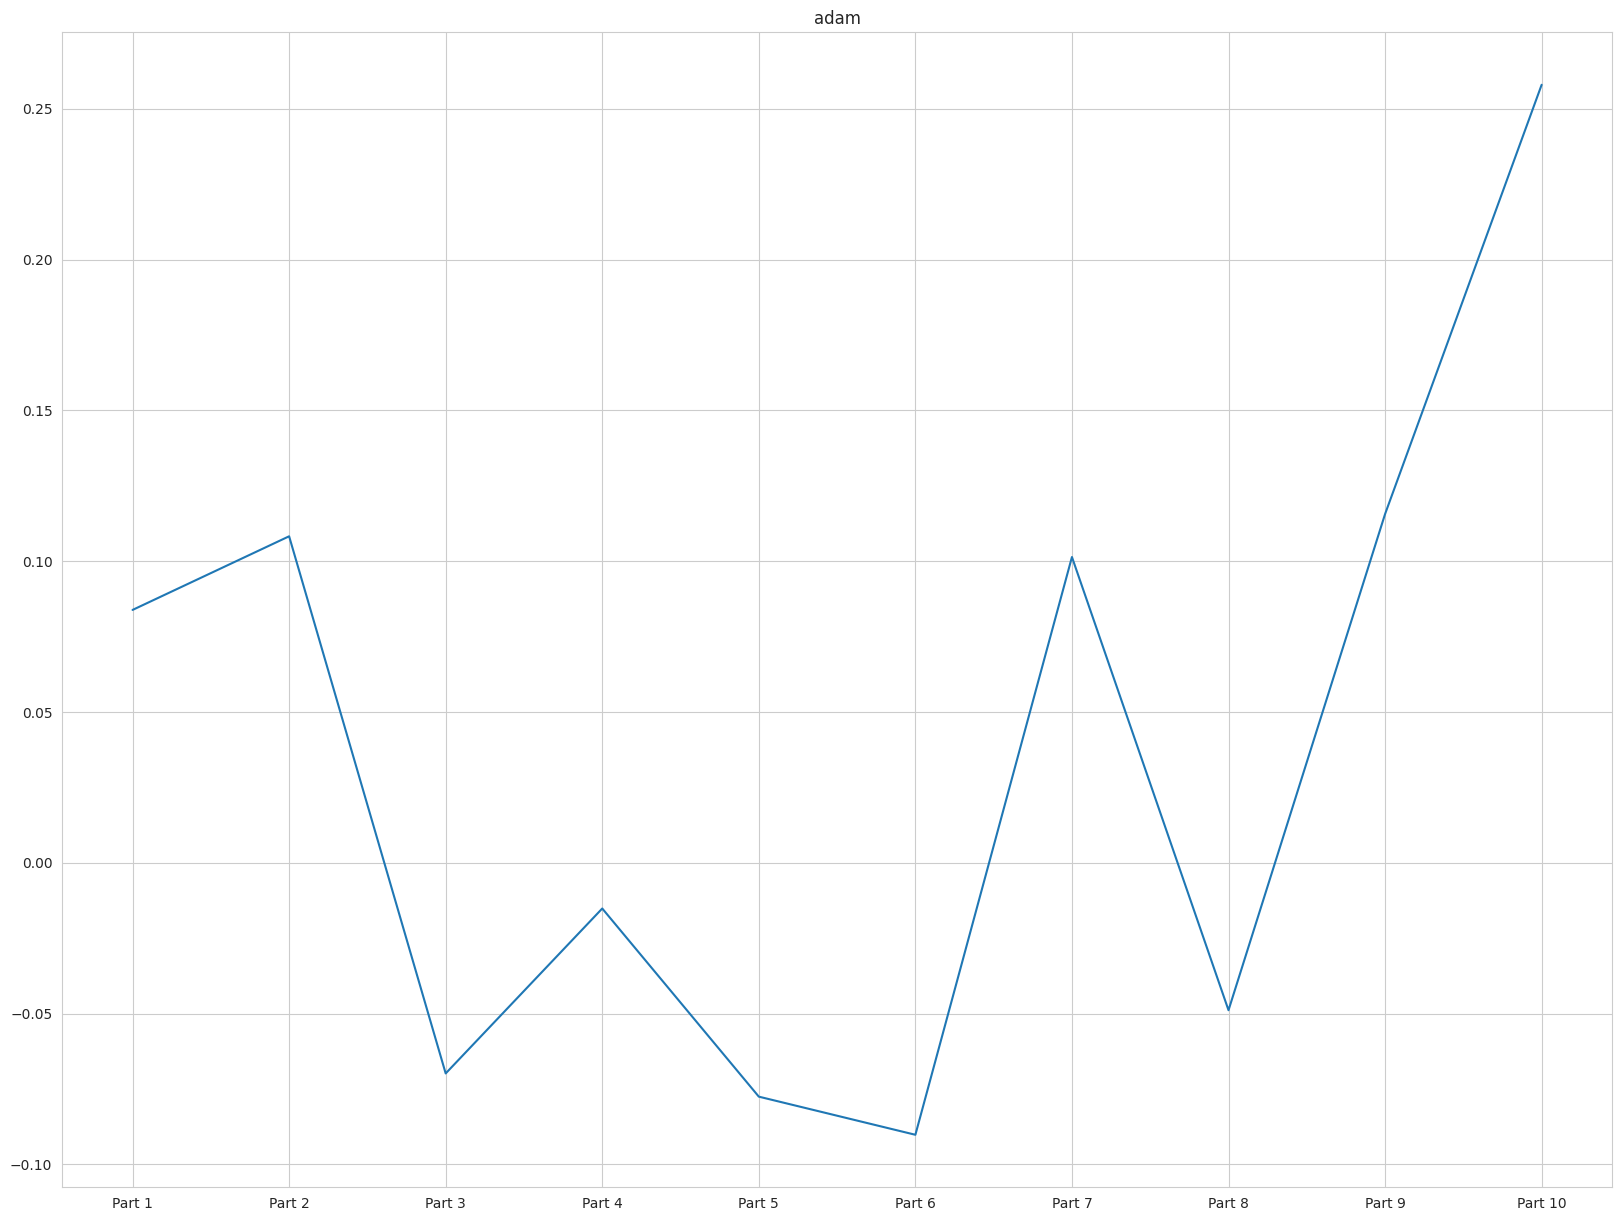

In [ ]:
# Show the plot for one comedian
plt.plot(polarity_transcript[0])
plt.xticks(range(10), labels=[f"Part {i+1}" for i in range(10)])
plt.title(data['full_name'].index[0])
plt.show()

Part 3 and Part 6 of Adam Sandlar's script are most negative.

<ipython-input-17-4961b244b9a1>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(data['full_name'][index])
<ipython-input-17-4961b244b9a1>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(data['full_name'][index])
<ipython-input-17-4961b244b9a1>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(data['full_name'][index])
<ipython-input-17-4961b244b9a1>:9: FutureWarning: Series.__getitem__ treating keys as

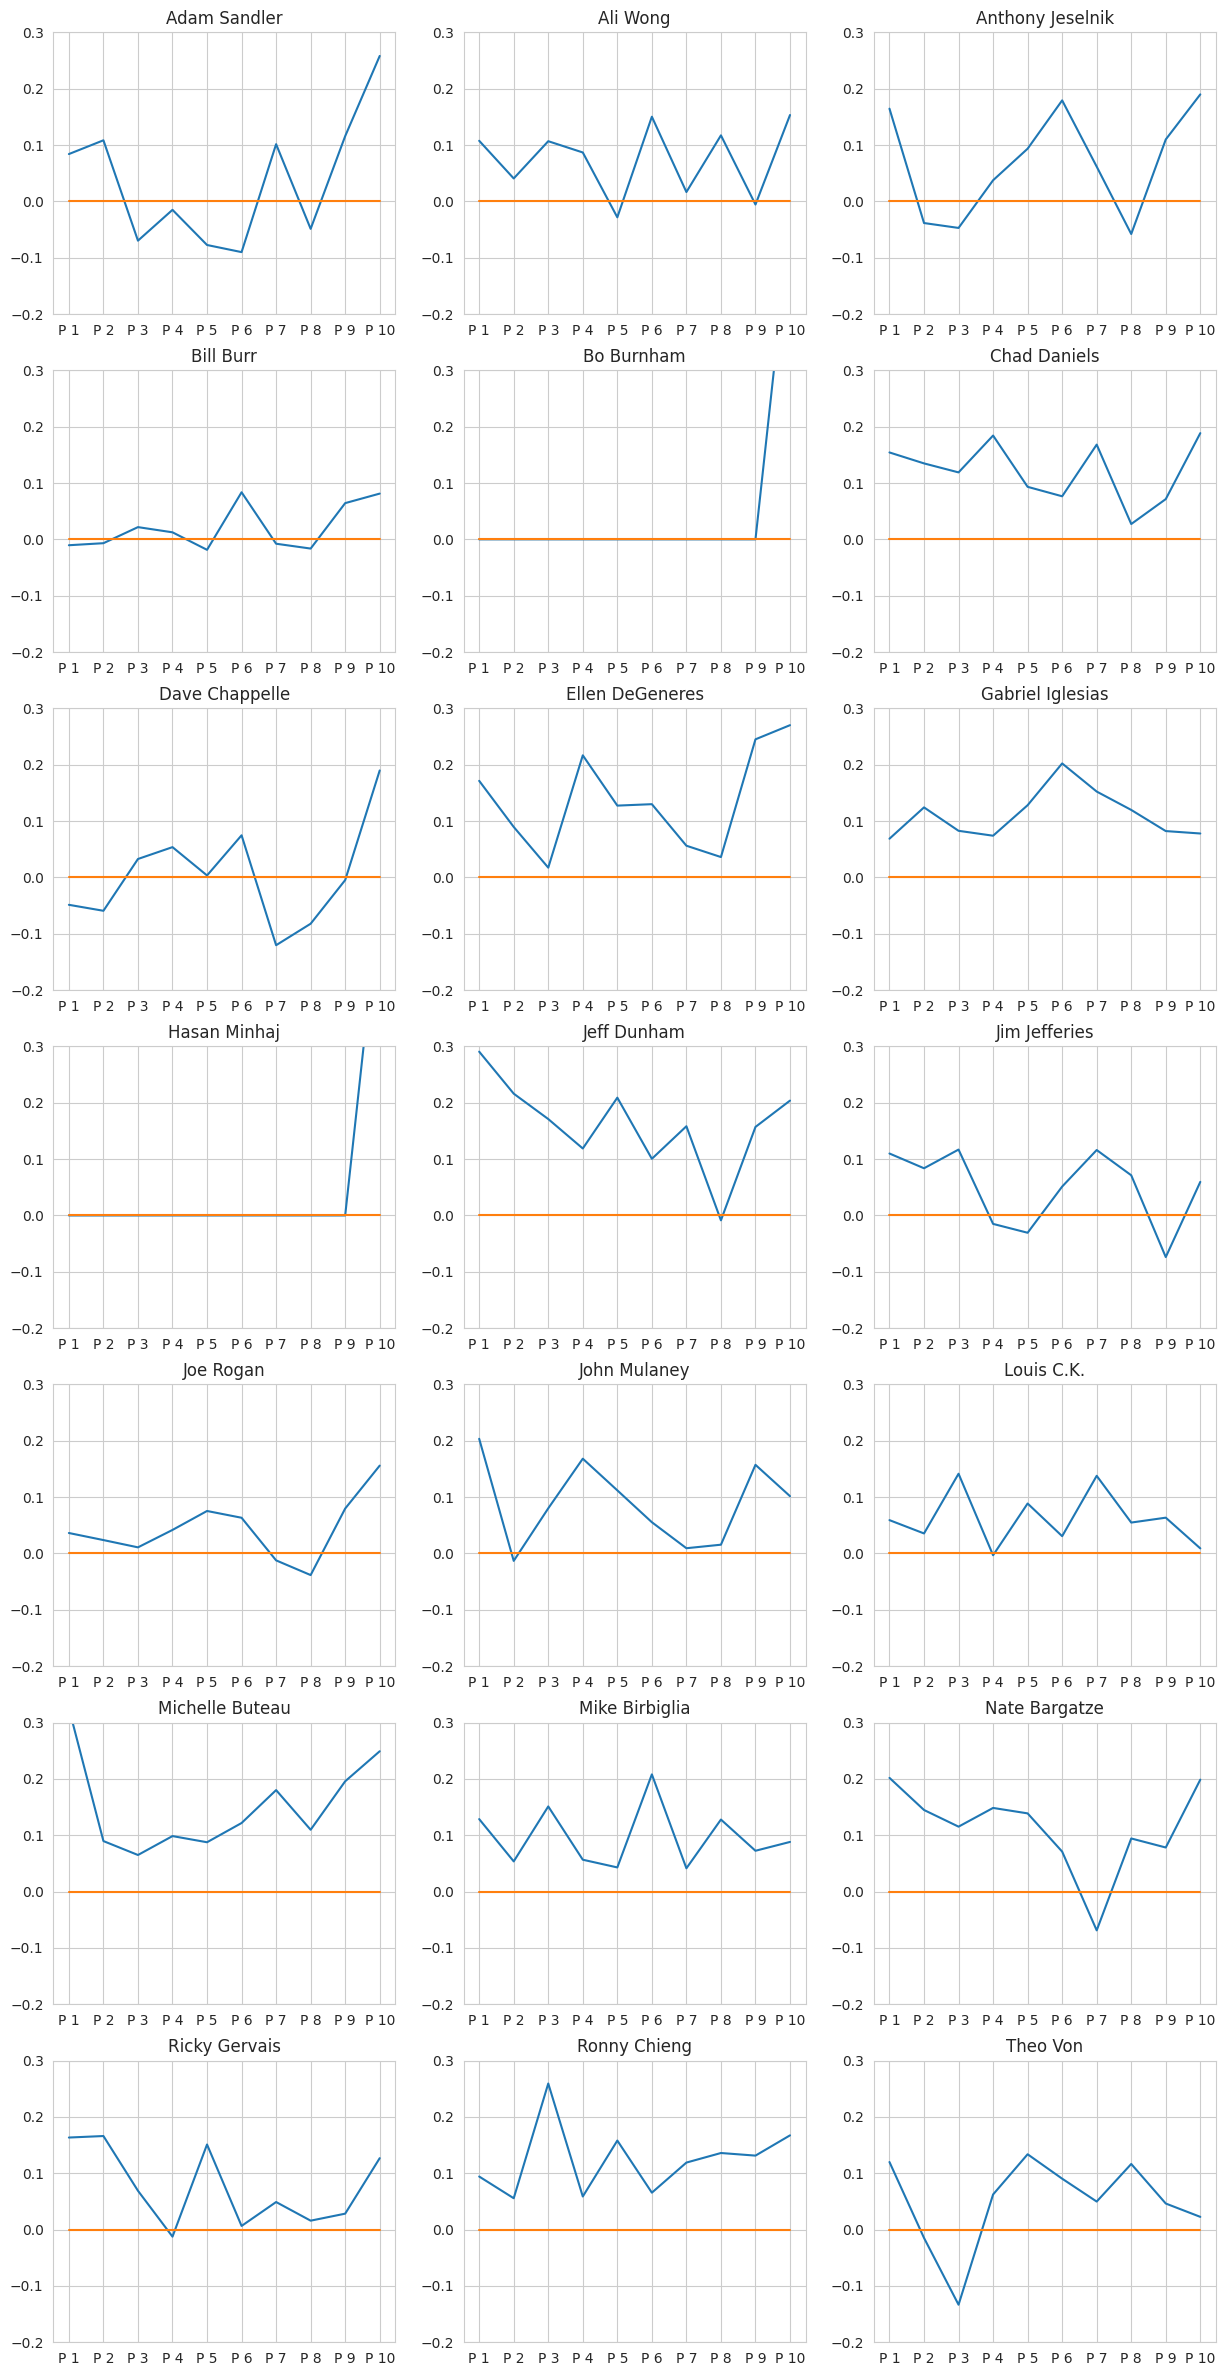

In [ ]:
# Show the plot for all comedians
plt.rcParams['figure.figsize'] = [15, 30]

for index, comedian in enumerate(data.index):
    plt.subplot(7, 3, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.xticks(range(10), labels=[f"P {i+1}" for i in range(10)])
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-.2, ymax=.3)

plt.show()

**Findings:**
Adam Sandlar and Dave Chapelle use many negative words in their comedy.

Michelle Buteau, Mike Birbiglia and Ronny Chieng use all positive words in their comedy.


Ali Wong stays generally positive throughout her routine. Similar comedians are Louis C.K. and Mike Birbiglia.

On the other hand, you have some pretty different patterns here like Bo Burnham who gets happier as time passes and Dave Chappelle who has some pretty down moments in his routine.

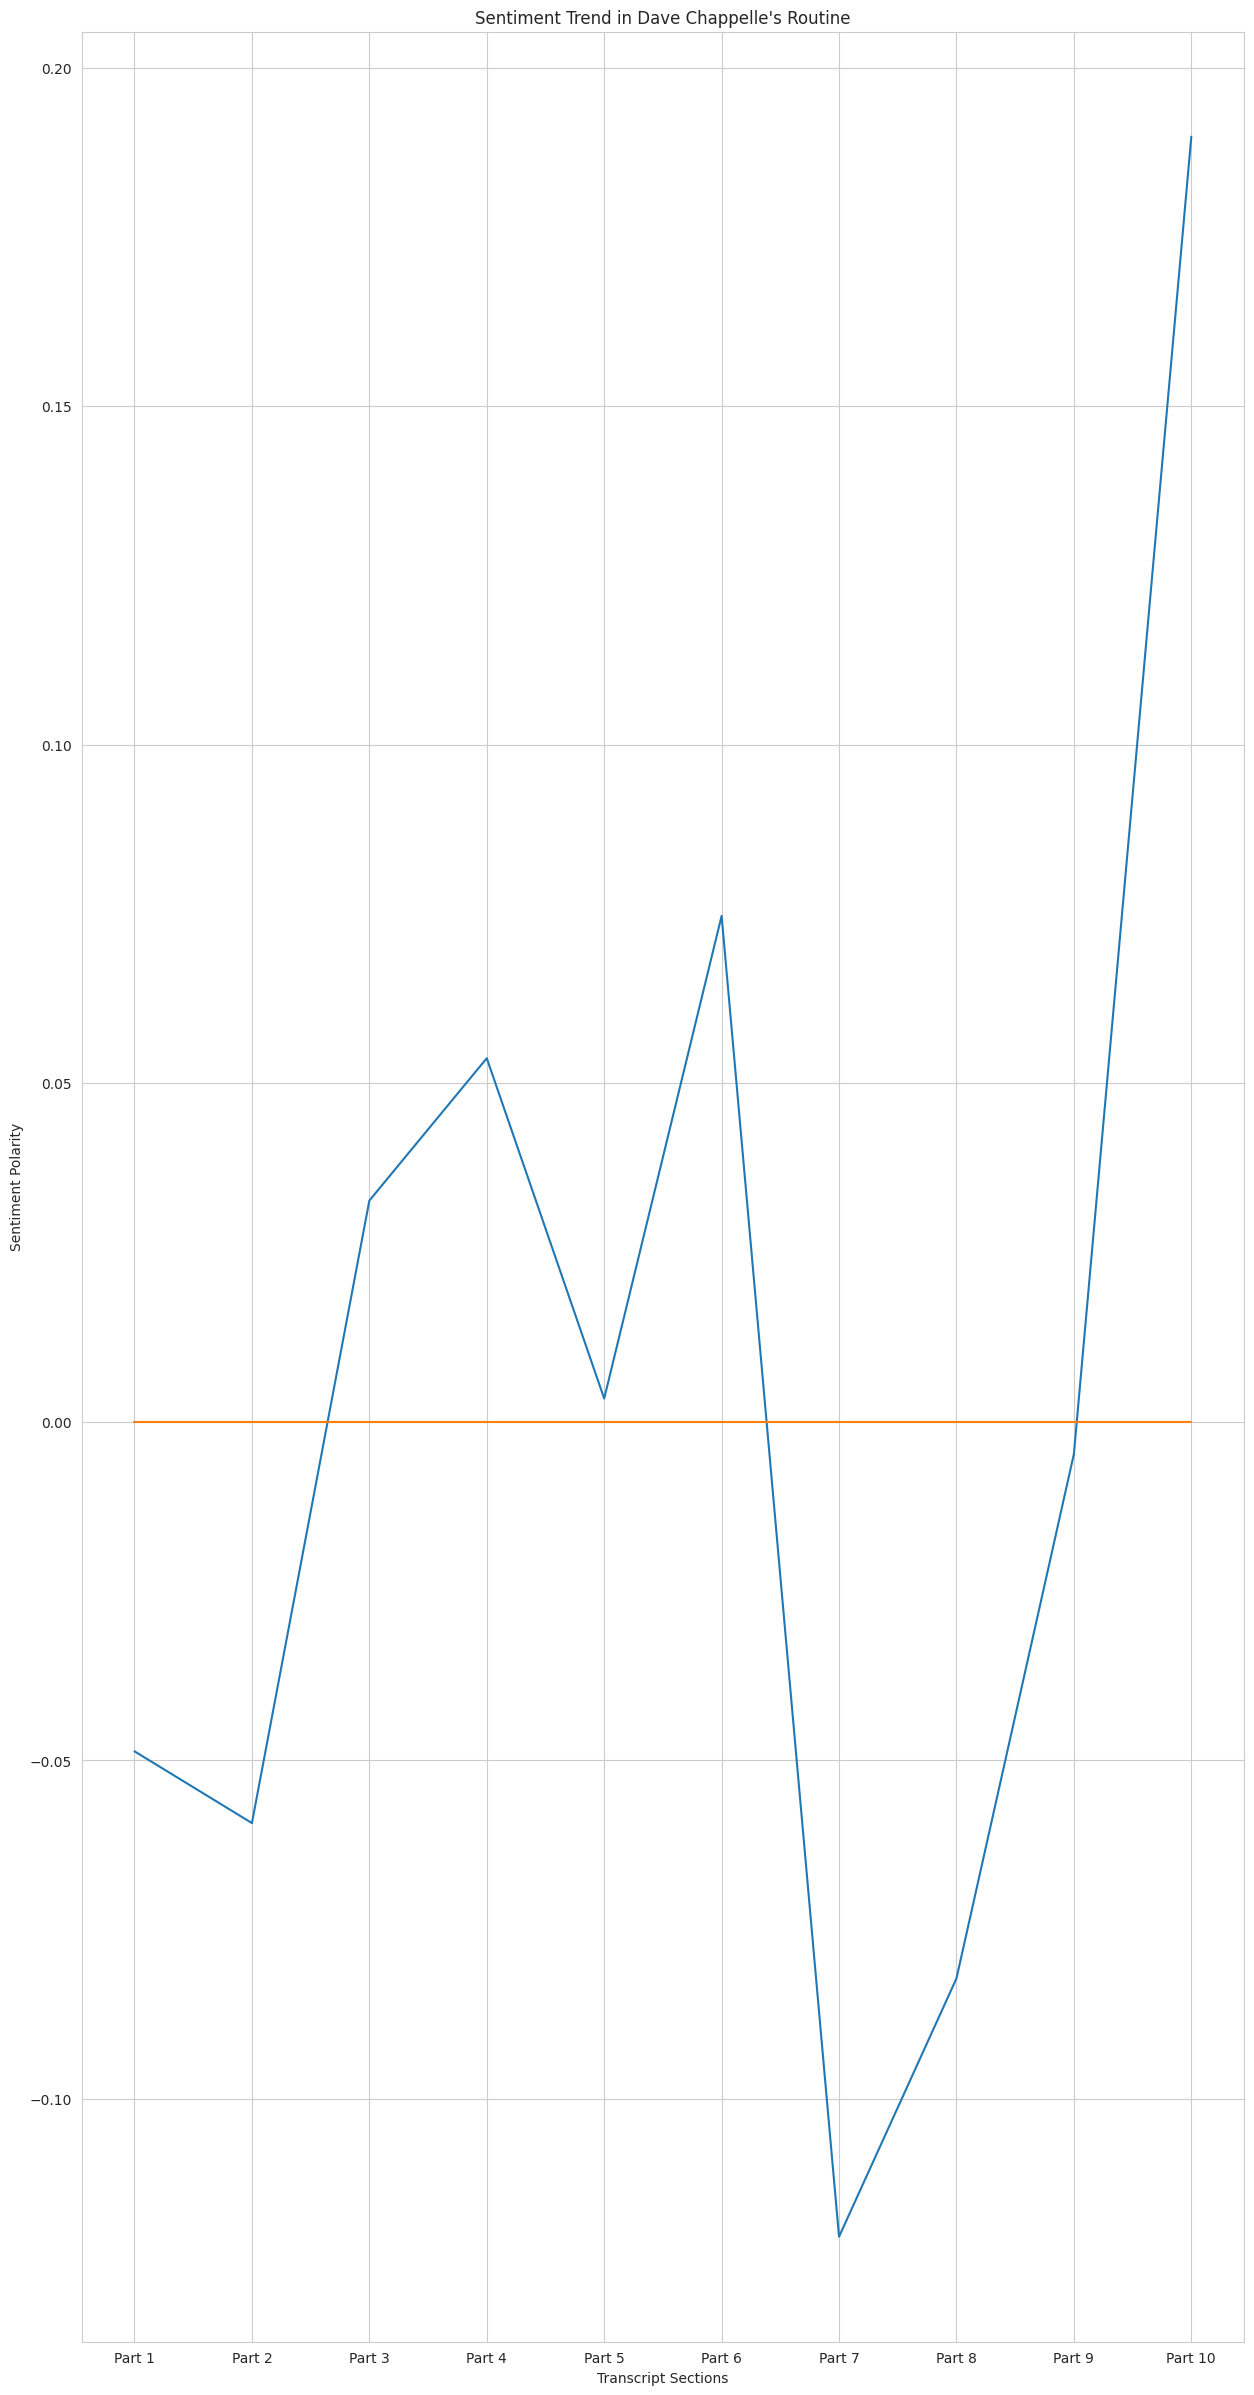

In [ ]:
# Show the plot for Dave Chapelle
plt.plot(polarity_transcript[6])
plt.plot(np.arange(0,10), np.zeros(10))
plt.xticks(range(10), labels=[f"Part {i+1}" for i in range(10)])
plt.xlabel("Transcript Sections")
plt.ylabel("Sentiment Polarity")
plt.title("Sentiment Trend in Dave Chappelle's Routine")
plt.show()

The 7th and 8th segments have the lowest polarity (-0.11 and -0.08).

In [ ]:
chappelle_part_7 = list_pieces[6][6]
chappelle_part_7


'o bad, the teacher looked at all the kids and was like… “You can go home.” It was a goddamn national tragedy. This was Cold War America. The Russians were laughing at us.\nMy point is, for a guy your age wouldn’t even know the pain, because in your generation, it’s like the space shuttle blows up every fucking day. How can you care about anything when you know every goddamn thing? I’m getting over one cop shooting, and then another one happens, and then another one happens, and another one happens. I’m crying about Paris, and then Brussels happens. I can’t keep track of all this shit. So you just give the fuck up. That’s the hallmark of your generation, and that’s fucked up, because your generation lives in the most difficult time in human history. This is the age of spin. The age where nobody knows what the fuck they’re even looking at. Did you know that Planned Parenthood was for abortions? It’s for people that don’t plan things out at all. That’s right. So, a guy your age doesn’t r

In [ ]:
from collections import Counter
import re
# Extract all words from Chappelle's Part 7 with their counts
word_counts_part_7 = Counter(re.findall(r'\b\w+\b', chappelle_part_7.lower()))

# Convert to a sorted list of tuples (word, count), sorted by frequency
unique_words_with_counts = sorted(word_counts_part_7.items(), key=lambda x: x[1], reverse=True)

# Display the list of unique words with their counts
unique_words_with_counts


[('the', 47),
 ('and', 42),
 ('that', 23),
 ('was', 20),
 ('they', 20),
 ('were', 18),
 ('of', 18),
 ('to', 18),
 ('it', 17),
 ('in', 16),
 ('s', 16),
 ('a', 15),
 ('you', 14),
 ('for', 12),
 ('i', 12),
 ('like', 11),
 ('t', 11),
 ('all', 10),
 ('up', 10),
 ('this', 8),
 ('your', 8),
 ('we', 8),
 ('on', 8),
 ('when', 7),
 ('be', 7),
 ('fucking', 6),
 ('about', 6),
 ('then', 6),
 ('time', 6),
 ('at', 5),
 ('is', 5),
 ('know', 5),
 ('generation', 5),
 ('care', 5),
 ('shit', 5),
 ('just', 5),
 ('people', 5),
 ('out', 5),
 ('bears', 5),
 ('very', 5),
 ('would', 5),
 ('men', 5),
 ('women', 5),
 ('can', 4),
 ('war', 4),
 ('america', 4),
 ('age', 4),
 ('even', 4),
 ('m', 4),
 ('one', 4),
 ('happens', 4),
 ('he', 4),
 ('not', 4),
 ('teddy', 4),
 ('had', 4),
 ('got', 4),
 ('gonna', 4),
 ('mad', 4),
 ('back', 4),
 ('first', 4),
 ('europe', 4),
 ('go', 3),
 ('us', 3),
 ('because', 3),
 ('anything', 3),
 ('another', 3),
 ('fuck', 3),
 ('fucked', 3),
 ('what', 3),
 ('did', 3),
 ('don', 3),
 ('thing

In [ ]:
negative_words = [word for word in word_counts_part_7 if TextBlob(word).sentiment.polarity < 0]

negative_words

['bad',
 'cold',
 'fucking',
 'crying',
 'shit',
 'fuck',
 'fucked',
 'difficult',
 'mean',
 'other',
 'little',
 'broken',
 'impossible',
 'angry',
 'mad',
 'black',
 'long',
 'sorry',
 'desperate',
 'hard',
 'crazy',
 'behind',
 'down']

Strong language like "fucking," "shit," and "fuck" suggests intensity, humor, or criticism.

Emotional words like "mad," "crying," "broken," "desperate," "angry," and "sorry" hint at serious or dramatic moments.

References to war, race, and society (e.g., "generation," "war," "black") suggest social commentary.

## Additional Exercises

1. Modify the number of sections the comedy routine is split into and see how the charts over time change.

In [ ]:
list_pieces = []
for t in data.transcript:
    split = split_text(t,5)
    list_pieces.append(split)

list_pieces

[[' \n\n\n\n\n\n\n\nAdam Sandler: Love You (2024) | Transcript - Scraps from the loft\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\t\tSkip to content\n\n\n\n\n\n\n\n\n\n \n\n\n\n\n\n\n\n\n\n\n\t\t\t\t\t\tSearch\t\t\t\t\t\n \n\n\n \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMOVIES\n\nMOVIE REVIEWS\nMOVIE TRANSCRIPTS\n\n\nTV SERIES\n\nTV SHOW TRANSCRIPTS\n\n\nCOMEDY\n\nSTAND-UP COMEDY TRANSCRIPTS\nGEORGE CARLIN\nDAVE CHAPPELLE\n\n\nINTERVIEWS\n\nPLAYBOY INTERVIEWS\n\n\nMUSIC\nHISTORY\nBOOKS\nOPINIONS\n \n\n \n\nMOVIES\n\nMOVIE REVIEWS\nMOVIE TRANSCRIPTS\n\n\nTV SERIES\n\nTV SHOW TRANSCRIPTS\n\n\nCOMEDY\n\nSTAND-UP COMEDY TRANSCRIPTS\nGEORGE CARLIN\nDAVE CHAPPELLE\n\n\nINTERVIEWS\n\nPLAYBOY INTERVIEWS\n\n\nMUSIC\nHISTORY\nBOOKS\nOPINIONS\n \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nCOMEDY \n\n\n\n\n\n\n\nAdam Sandler: Love You (2024) | Transcript \n\n\n\n\n\n\n\nAugust 

In [ ]:
len(list_pieces[0])

5

In [ ]:
polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)

polarity_transcript

[[0.0968682333391385,
  -0.04196747985810485,
  -0.08619183156647642,
  0.011922622175512345,
  0.18667069858246324],
 [0.07166697428325335,
  0.09758993090243091,
  0.06823318908404673,
  0.058262651431256064,
  0.0724831349206349],
 [0.05874678783925364,
  -0.009229616206360399,
  0.130491320454007,
  0.0039528218694885155,
  0.14567150139580048],
 [-0.008383997538409323,
  0.017046724176578515,
  0.03173531042128602,
  -0.011706724987975004,
  0.07239226286327738],
 [0.0, 0.0, 0.0, 0.0, 0.5625],
 [0.14534817377772888,
  0.15366594985101475,
  0.08445783229116569,
  0.10249082824417652,
  0.12142632248324926],
 [-0.05414280373389417,
  0.04406815299534373,
  0.0426074380165289,
  -0.09924325557281845,
  0.08521006018099042],
 [0.1363172787152379,
  0.10273836723241483,
  0.12850662234590807,
  0.047077545174560115,
  0.2562417118746231],
 [0.09489407487224079,
  0.07867810760667904,
  0.1650185288050778,
  0.13863011972798153,
  0.08016194885361556],
 [0.0, 0.0, 0.0, 0.0, 0.5625],
 [

<ipython-input-32-dc8cad5e638b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(data['full_name'][index])
<ipython-input-32-dc8cad5e638b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(data['full_name'][index])
<ipython-input-32-dc8cad5e638b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(data['full_name'][index])
<ipython-input-32-dc8cad5e638b>:9: FutureWarning: Series.__getitem__ treating keys as

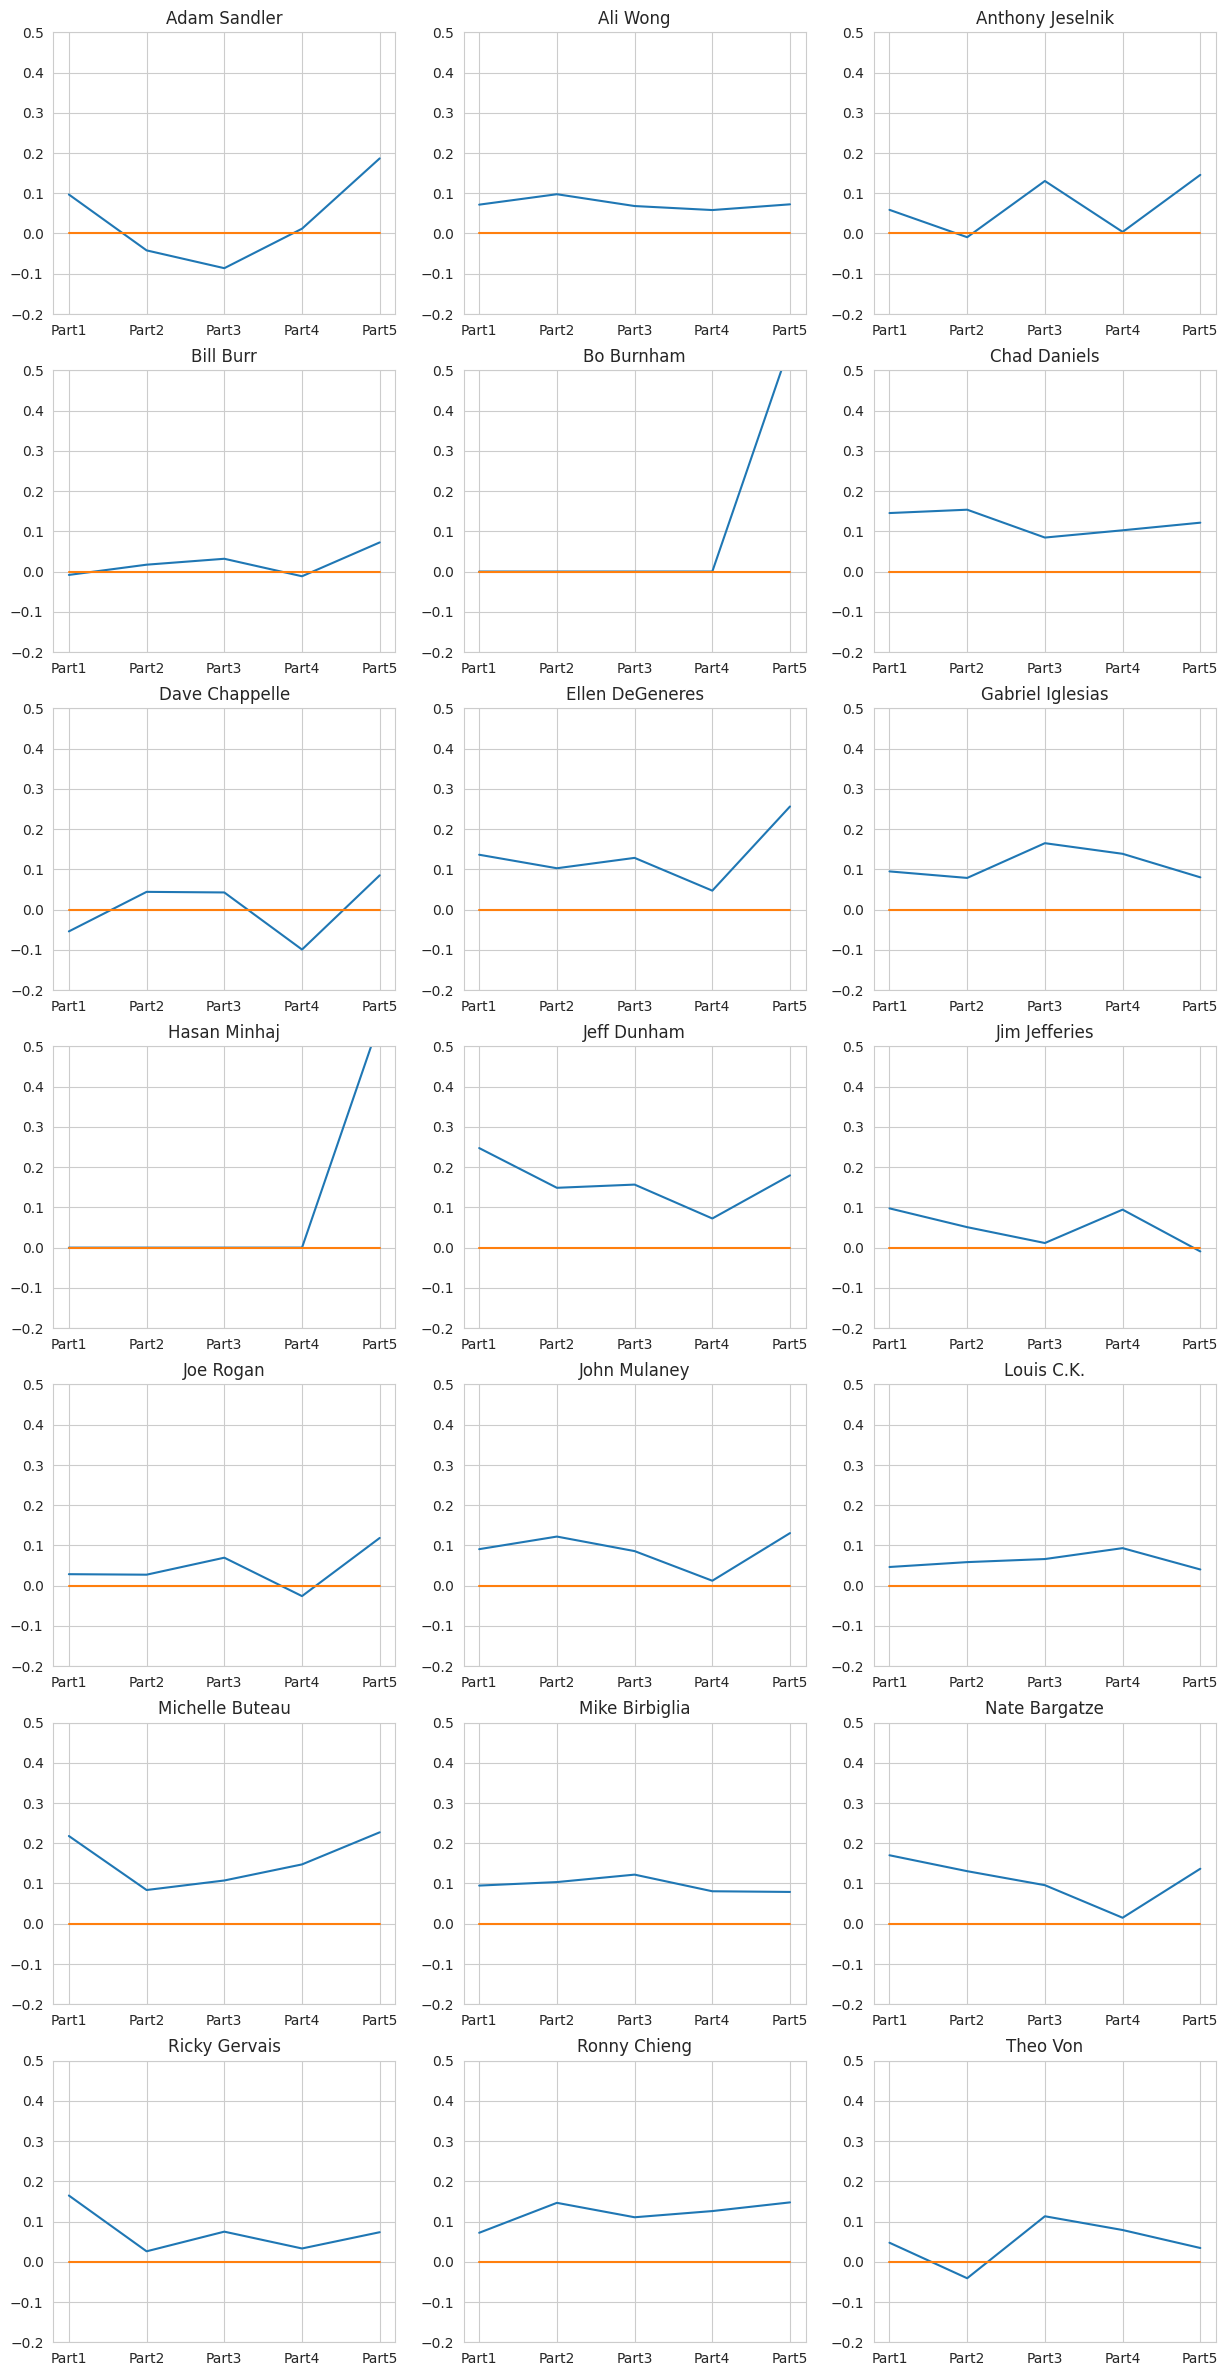

In [ ]:
# Show the plot for all comedians
plt.rcParams['figure.figsize'] = [15, 30]

for index, comedian in enumerate(data.index):
    plt.subplot(7, 3, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,5), np.zeros(5))
    plt.xticks(range(5), labels=[f"Part{i+1}" for i in range(5)])
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-.2, ymax=.5)

plt.show()

Smoother sentiment curves, as fewer segments average out variations.

Shows general trends but lacks fine details.

In [ ]:
list_pieces = []
for t in data.transcript:
    split = split_text(t,20)
    list_pieces.append(split)

list_pieces

[[' \n\n\n\n\n\n\n\nAdam Sandler: Love You (2024) | Transcript - Scraps from the loft\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\t\tSkip to content\n\n\n\n\n\n\n\n\n\n \n\n\n\n\n\n\n\n\n\n\n\t\t\t\t\t\tSearch\t\t\t\t\t\n \n\n\n \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMOVIES\n\nMOVIE REVIEWS\nMOVIE TRANSCRIPTS\n\n\nTV SERIES\n\nTV SHOW TRANSCRIPTS\n\n\nCOMEDY\n\nSTAND-UP COMEDY TRANSCRIPTS\nGEORGE CARLIN\nDAVE CHAPPELLE\n\n\nINTERVIEWS\n\nPLAYBOY INTERVIEWS\n\n\nMUSIC\nHISTORY\nBOOKS\nOPINIONS\n \n\n \n\nMOVIES\n\nMOVIE REVIEWS\nMOVIE TRANSCRIPTS\n\n\nTV SERIES\n\nTV SHOW TRANSCRIPTS\n\n\nCOMEDY\n\nSTAND-UP COMEDY TRANSCRIPTS\nGEORGE CARLIN\nDAVE CHAPPELLE\n\n\nINTERVIEWS\n\nPLAYBOY INTERVIEWS\n\n\nMUSIC\nHISTORY\nBOOKS\nOPINIONS\n \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nCOMEDY \n\n\n\n\n\n\n\nAdam Sandler: Love You (2024) | Transcript \n\n\n\n\n\n\n\nAugust 

In [ ]:
len(list_pieces[0])

20

In [ ]:
polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)

polarity_transcript

[[-0.04408730158730158,
  0.15118663926229717,
  0.16110429067460313,
  0.07752892561983471,
  0.003417441611886072,
  -0.15586234040717736,
  -0.0796933621933622,
  0.05728356818918043,
  -0.04718491735537192,
  -0.10918534080298788,
  -0.05686113654863654,
  -0.13433144599303137,
  0.21906712701549658,
  -0.1241369047619048,
  0.006950757575757584,
  -0.11546833664021167,
  0.15183962264150944,
  0.06770833333333333,
  0.27379454926624736,
  0.23757259001161435],
 [0.1604899267399267,
  0.06687675070028008,
  0.06041241496598641,
  0.02699864498644986,
  0.13341750841750843,
  0.09244032994032995,
  0.03813527494331065,
  0.11819444444444446,
  0.031034482758620686,
  -0.08232142857142857,
  0.13258275156404267,
  0.1641332442067736,
  -0.003629519989814109,
  0.033096205962059616,
  0.1906001984126984,
  0.058227513227513225,
  -0.043423353909465,
  0.020360195360195378,
  0.1429563492063492,
  0.16624149659863946],
 [0.25964813955885385,
  0.10338691796008873,
  0.01832096474953619

<ipython-input-39-b6c2bc60f37a>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(data['full_name'][index])
<ipython-input-39-b6c2bc60f37a>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(data['full_name'][index])
<ipython-input-39-b6c2bc60f37a>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(data['full_name'][index])
<ipython-input-39-b6c2bc60f37a>:9: FutureWarning: Series.__getitem__ treating keys as

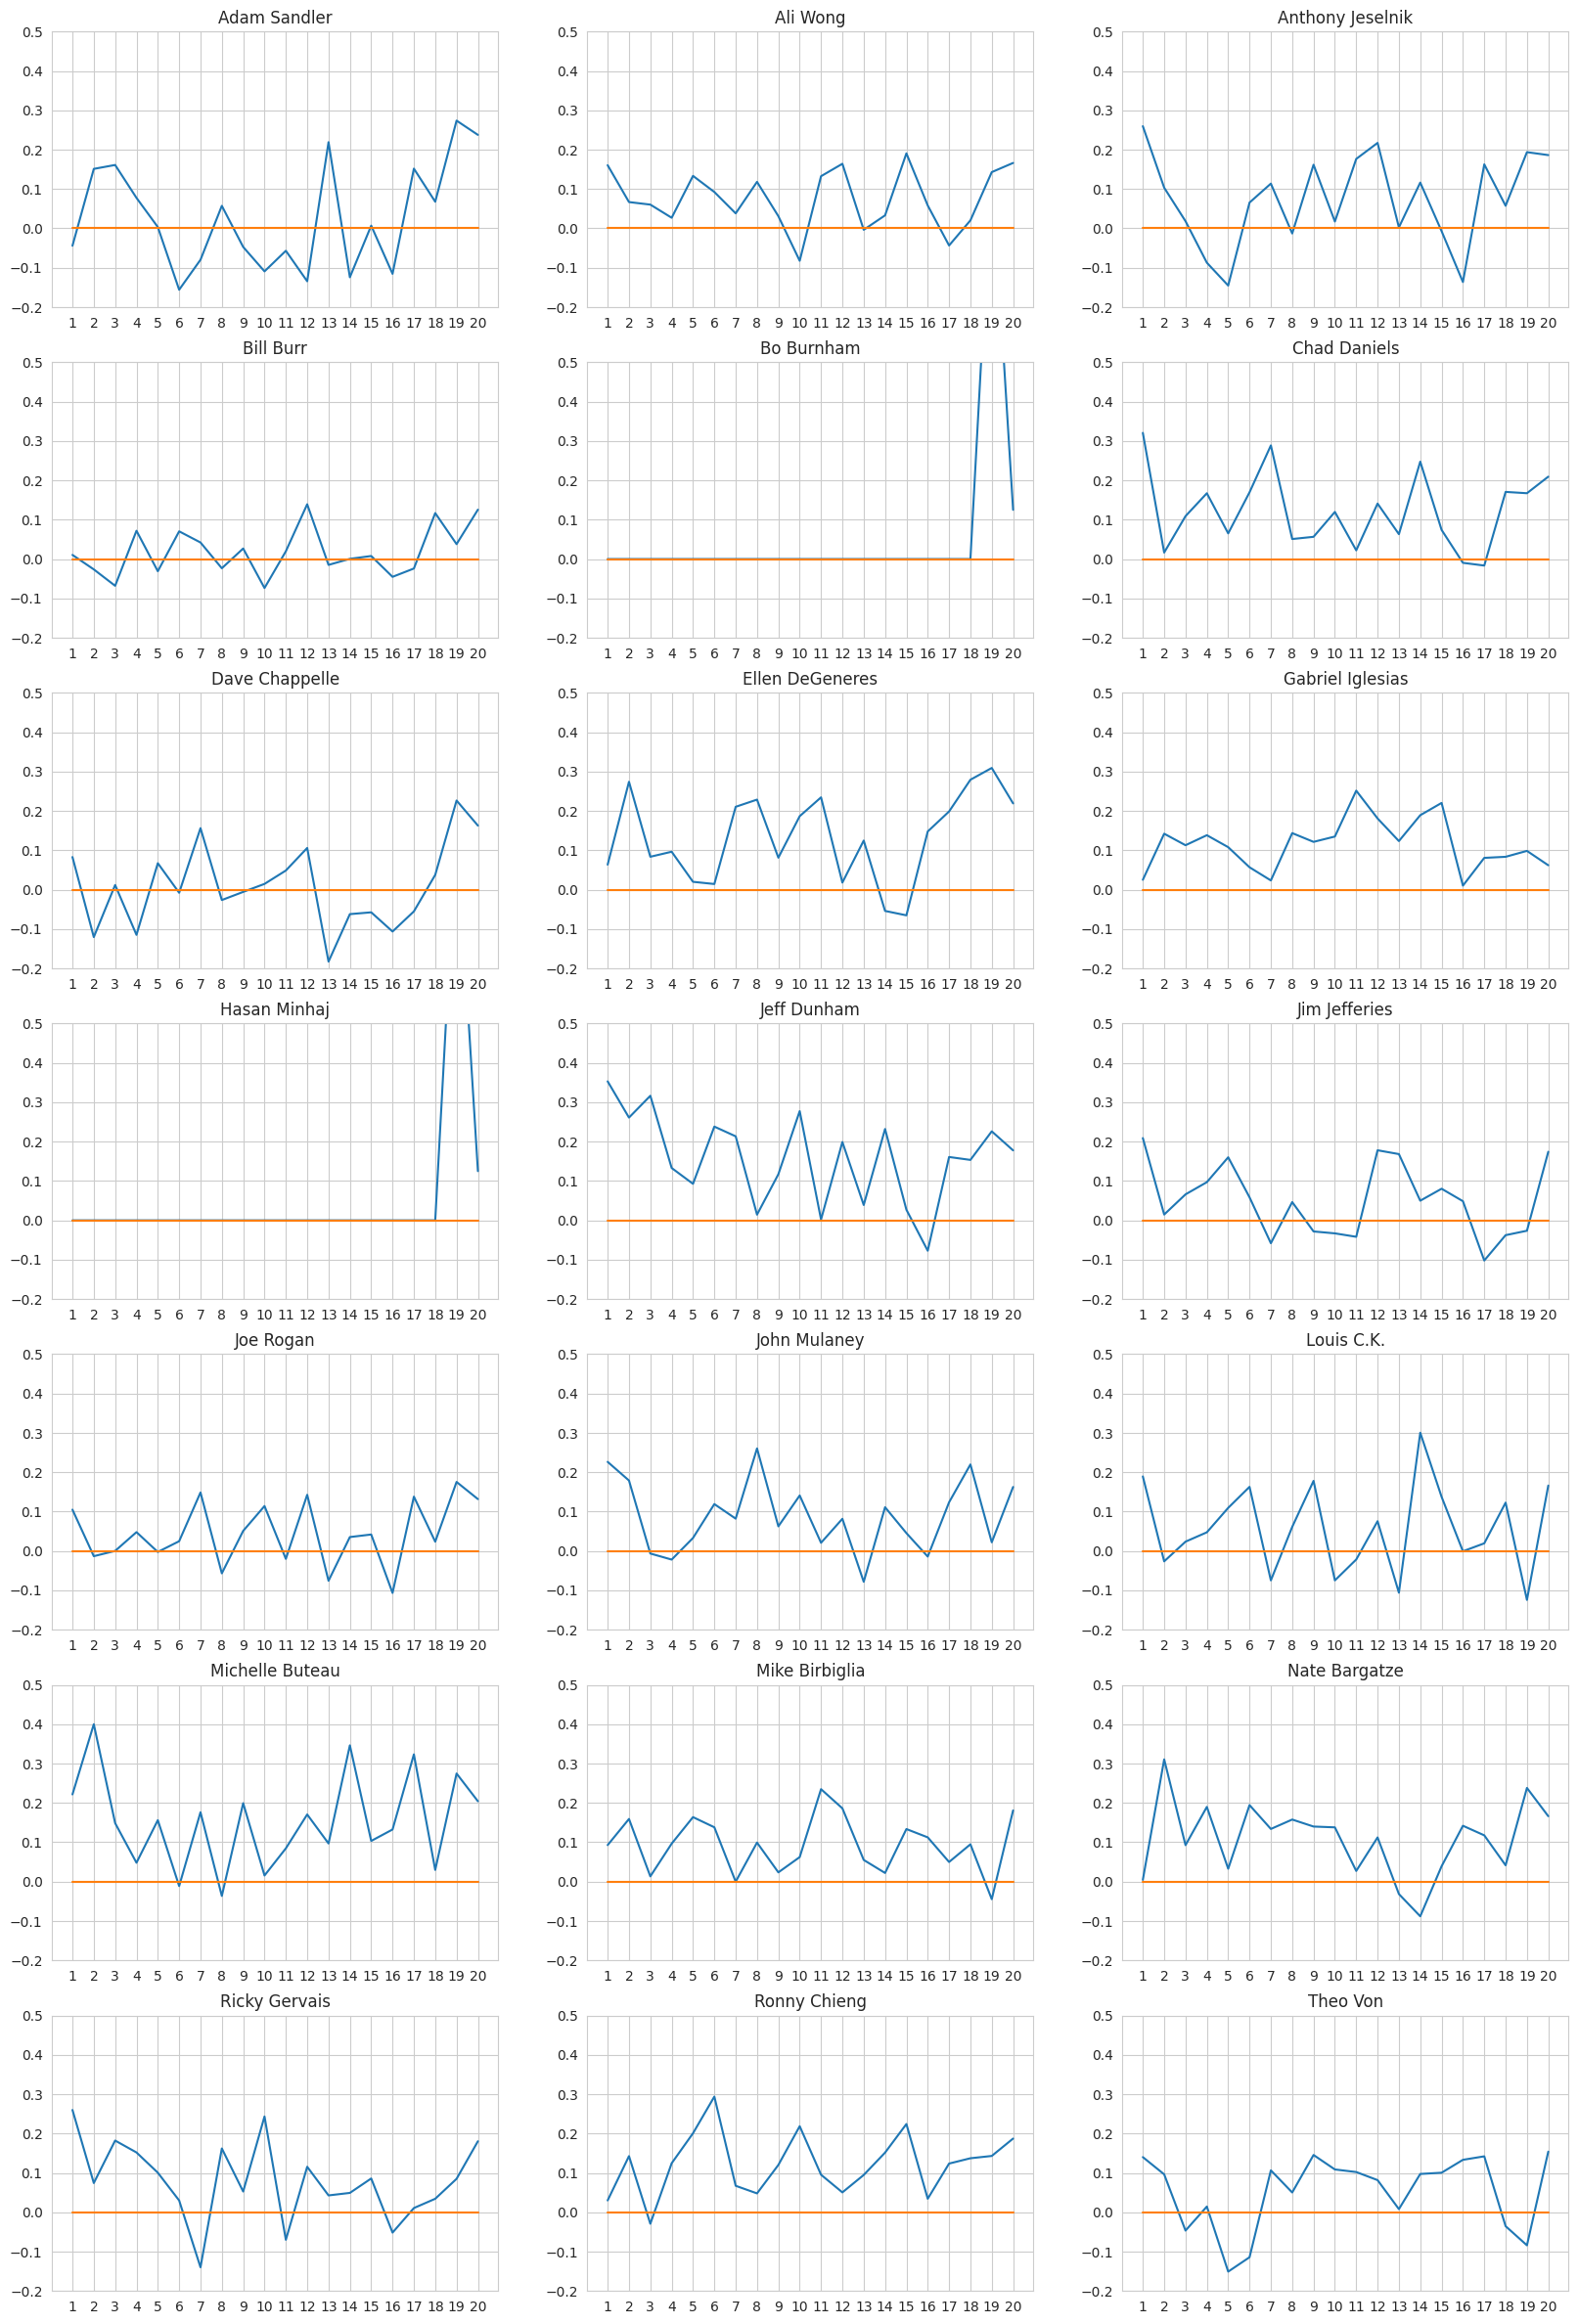

In [ ]:
# Show the plot for all comedians
plt.rcParams['figure.figsize'] = [20, 30]

for index, comedian in enumerate(data.index):
    plt.subplot(7, 3, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,20), np.zeros(20))
    plt.xticks(range(20), labels=[f"{i+1}" for i in range(20)])
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-.2, ymax=.5)

plt.show()

More granular insights but also more fluctuations due to small section sizes.

Captures sharp emotional changes in the routine.